# Challenge

In [232]:
from sklearn.metrics import silhouette_score
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
!conda install giotto-tda
from gtda.time_series import SingleTakensEmbedding

import datetime
import pandas as pd
import numpy as np
%matplotlib inline

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - giotto-tda

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-arm64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




ModuleNotFoundError: No module named 'gtda'

In [139]:
file = "/Users/alvaro/Documents/6TO SEMESTRE/Topologia/RETO RETO/Reto backup/Untitled 08-28-50-727/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl" #para correr en mac

#file = "C:/Users/guzma/OneDrive/Documents/TEC/S6/MA2007/Reto/noaa_ai_workshop/IntroNotebooks/uke_eggedal_data_challenge.pkl"
df = pd.read_pickle(file)

## Data Cleaning

In [140]:
df["precipitation"] = df.pop("obs_pr")
df["temperature"] = df.pop("obs_tas")

In [141]:
length_42=[]
length_46=[]
i=0
for index,column in enumerate(df.keys()):
    print((index, column, len(df[column])))
    
    if len(df[column])== 21542:
        length_42.append(list(df.keys())[index])
    if len(df[column])== 21546:
        length_46.append(list(df.keys())[index])
    

(0, 'flow', 21542)
(1, 'flow_dates', 21542)
(2, 'obs_lon_lat', 2)
(3, 'obs_dates', 21546)
(4, 'precipitation', 21546)
(5, 'temperature', 21546)


In [142]:
df_list=[]
for name in df.keys(): 
    df_temp= pd.DataFrame(df[name])
    if df_temp.shape[1] ==1:
        df_temp.columns=[name]
    else: 
        columns=[]
        for index in range(df_temp.shape[1]):
             columns.append(name + "_" +str(index))
        df_temp.columns= columns
    df_list.append(df_temp)
    
df_dict= dict(zip(df.keys(), df_list))

SE JUNTARON LOS DOS DATAFRAMES HECHOS PARA PRECIPITACION Y TEMPERATURA RESPECTIVAMENTE, Y POSTERIORMENTE SE UNIERON CON SUS VARIABLES DE FECHA RESPECTIVAS.
ESTO CAUSO QUE SE PIERDAN ALGUNAS FECHAS DE AMBAS VARIABLES, DADO QUE SÓLO SE ESTÁN TOMANDO LOS DATOS DONDE EN UNE FECHA DADA HAYA REGISTROS DE AMBOS TIPOS DE MEDICIONES. POR EJEMPLO, LAS FILAS DONDE, DESPUES DE HACER EL CONCAT, HABIA DATOS DE OBERVACION PERO LOS DATOS DE TEMPERATURA ERAN NULOS NO SE TOMABAN EN CUENTA

In [144]:
df_42= df_dict["flow"]
df_46= df_dict["temperature"]

for column in length_42:
    if column != "flow":
        df_42= pd.concat([df_42, df_dict[column].reset_index().drop("index", 1)], axis=1)
for column in length_46:
    if column != "temperature":
        df_46= pd.concat([df_46, df_dict[column].reset_index().drop("index", 1)], axis=1)

df_46=df_46.set_index("obs_dates")
df_42=df_42.set_index("flow_dates")
data= pd.concat([df_42, df_46], axis=1)
data = data.dropna(axis=0)
#data.to_csv("data.csv", index=0)

data

/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_9867/1856850626.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_42= pd.concat([df_42, df_dict[column].reset_index().drop("index", 1)], axis=1)
/var/folders/h4/3w1ndbld1bl7hnc6b9pzsphr0000gn/T/ipykernel_9867/1856850626.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_46= pd.concat([df_46, df_dict[column].reset_index().drop("index", 1)], axis=1)


flow  temperature_0  temperature_1  temperature_2  \
1958-01-04  1.723781          -12.8     -13.000000          -13.0   
1958-01-05  0.960882           -7.8      -7.900000           -8.4   
1958-01-06  0.001000          -11.0      -9.900000           -6.5   
1958-01-07  0.001000          -13.2     -12.200000           -7.9   
1958-01-08  0.316796          -19.9     -19.299999          -15.4   
...              ...            ...            ...            ...   
2015-12-27  2.177040          -12.5     -11.700000           -8.6   
2015-12-28  4.876250          -12.5     -11.900000           -9.1   
2015-12-29  4.998840          -11.9     -11.400000           -8.4   
2015-12-30  4.428777           -7.0      -6.500000           -3.4   
2015-12-31  4.047925           -2.4      -2.100000            1.3   

            temperature_3  temperature_4  temperature_5  temperature_6  \
1958-01-04          -12.5     -12.500000          -12.7     -12.000000   
1958-01-05           -7.0      -7.300000           -8.6      -6.500000   
1958-01-06           -8.5      -9.000000           -7.4      -7.900000   
1958-01-07          -10.7     -11.300000           -9.8     -10.100000   
1958-01-08          -18.4     -18.700001          -16.9     -17.700001   
...                   ...            ...            ...            ...   
2015-12-27          -11.0     -10.900000           -9.2      -9.700000   
2015-12-28          -11.4     -11.200000           -9.8     -10.600000   
2015-12-29          -10.8     -10.800000           -8.6      -9.300000   
2015-12-30           -5.9      -6.100000           -4.8      -5.000000   
2015-12-31           -1.5      -1.800000           -0.8      -0.900000   

            temperature_7  temperature_8  precipitation_0  precipitation_1  \
1958-01-04          -12.5          -12.9              0.0              0.0   
1958-01-05           -7.7           -8.3              2.0              2.2   
1958-01-06           -6.8           -5.8             12.7             11.0   
1958-01-07           -8.5           -7.4              6.6              6.9   
1958-01-08          -15.9          -14.9              3.4              3.6   
...                   ...            ...              ...              ...   
2015-12-27           -8.4           -7.5              2.2              0.1   
2015-12-28           -8.6           -7.5              5.5              4.9   
2015-12-29           -7.2           -6.3              1.8              1.7   
2015-12-30           -3.8           -3.0              4.1              3.5   
2015-12-31            0.5            1.1              6.4              7.4   

            precipitation_2  precipitation_3  precipitation_4  \
1958-01-04              0.0              0.0              0.0   
1958-01-05              3.0              3.3              3.7   
1958-01-06             16.5             12.5             11.2   
1958-01-07              9.6              7.3              6.5   
1958-01-08              2.7              3.5              3.8   
...                     ...              ...              ...   
2015-12-27              1.1              1.5              0.1   
2015-12-28              8.3              6.1              3.7   
2015-12-29              2.1              2.7              0.2   
2015-12-30              4.6              5.1              3.5   
2015-12-31              8.5              8.4              8.4   

            precipitation_5  precipitation_6  precipitation_7  precipitation_8  
1958-01-04              0.0              0.0              0.0              0.0  
1958-01-05              0.7              3.1              4.2              1.1  
1958-01-06             12.2             14.1             14.2             10.5  
1958-01-07              5.2             10.4              5.7              3.7  
1958-01-08              3.3              2.9              4.0              3.5  
...                     ...              ...              ...              ...  
2015-12-27   

## DATA EXPLORATION

Dado que tenemos correlaciones muy fuertes entre precipitaciones y entre temperaturas y además se ve que lo ideal es tener dos componentes, se puede hacer PCA en cada una de manera separada. Entonces, por intuicion se podria decir que podriamos tener dos variables después de la reducción con PCA, una representando precipitacion y otra representando temperatura.

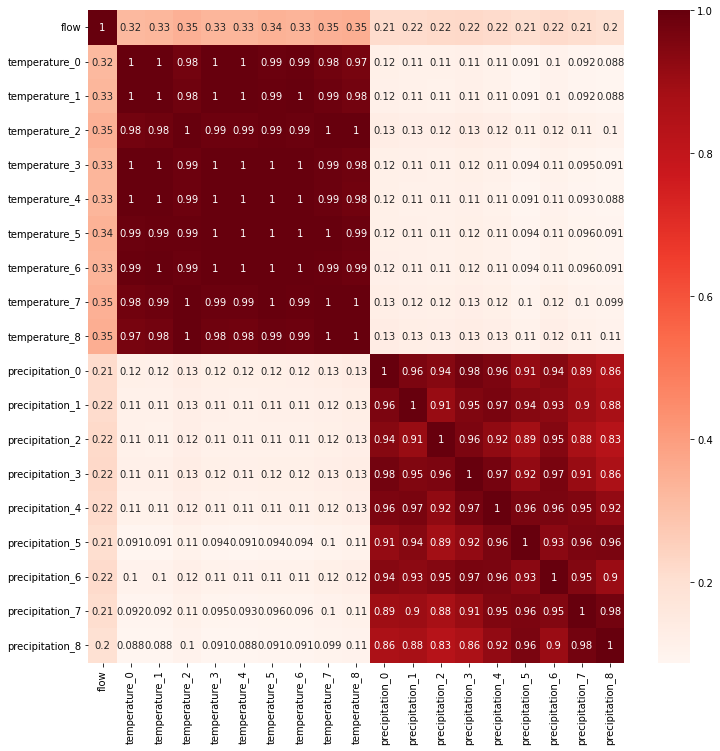

In [228]:
import seaborn as sns
plt.figure(figsize=(12, 12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="Reds")
plt.show()

Para corroborar esto, se realiza un analisis de descomposicion para evaluar cuantas componentes serían las optimas. El resultado hace considerar que 2 componentes son la cantidad optima para esto, afirmando la idea pasada. Ahora se tendra que reducir la dimension de nuestras variables predictoras. En este caso, tenemos 18 variables predictoras, lo cual nosotros reduciremos en dimensiones e intentaremos no perder mucho de la explicacion de estos datos al reducir dimensiones.

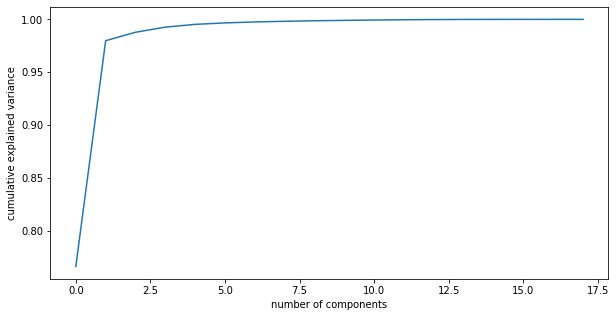

In [146]:
from sklearn.decomposition import PCA

X = data.drop(['flow'], axis=1)
y = data['flow']
pca = PCA().fit(X)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

^Como podemos observar, al utilizar 2 componentes nosotros explicamos alrededor de 98% de los datos.

In [164]:
# HACIENDO UNA COMPONENTE CON CADA CATEGORIA DE VARIABLE


pca = PCA(1)  # project from 64 to 2 dimensions
X_temp= data[[x for x in data.columns if "temp" in x]]
projected = pca.fit_transform(X_temp)
df_temp= pd.DataFrame(projected).rename({0: "Temperature_red"},axis=1)

pca = PCA(1)  # project from 64 to 2 dimensions
X_prec= data[[x for x in data.columns if "precip" in x]]
projected = pca.fit_transform(X_prec)

df_temp["Precipitation_red"]= projected #red = reduced
df_temp["date"]= data.index
df_temp=df_temp.set_index("date")
df_temp["flow"]= data["flow"].values

display(df_temp)
data_red= df_temp.copy()

Temperature_red  Precipitation_red      flow
date                                                    
1958-01-04        43.700607          -6.578077  1.723781
1958-01-05        28.921858           1.212091  0.960882
1958-01-06        29.877008          31.546004  0.001000
1958-01-07        35.950995          13.784001  0.001000
1958-01-08        57.957928           3.656685  0.316796
...                     ...                ...       ...
2015-12-27        35.446652          -5.071587  2.177040
2015-12-28        36.483412           7.658852  4.876250
2015-12-29        33.836393          -2.937514  4.998840
2015-12-30        20.798789           3.462255  4.428777
2015-12-31         7.838513          18.510594  4.047925

[21178 rows x 3 columns]

## Clustering
Con los datos reducidos, se procede a realizar el clustering, utilizando el metodo elbow y silhouette para determinar el numero optimo para $K$

### Metodo elbow para datos reducidos

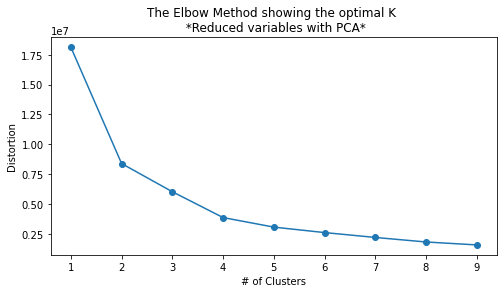

In [161]:
#Método SElbow para datos reducidos
X= data_red[["Temperature_red", "Precipitation_red"]]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K, distortions, marker= "o")
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K \n *Reduced variables with PCA*')
plt.show()

### Método elbow para datos no reducidos

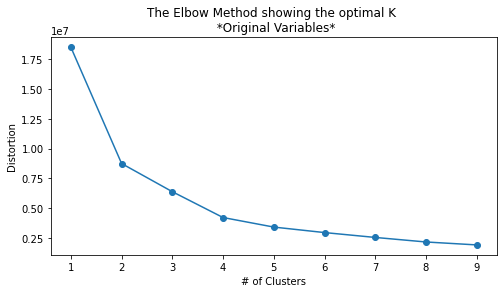

In [162]:
#Método SElbow para datos no reducidos
X = data.drop(['flow'], axis=1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K, distortions, marker= "o")
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal K \n *Original Variables*')
plt.show()

Se puede observar que los resultados no cambian significativamente entre los datos reducidos y los originales

### Silhouette

In [170]:
#reducidos
print("Silhouette para datos reducidos: ")
X= data_red[["Temperature_red", "Precipitation_red"]]
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
#no reducidos
print("\nSilhouette para datos no reducidos: ")
X = data.drop(['flow'], axis=1)
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Silhouette para datos reducidos: 
For n_clusters = 2, silhouette score is 0.4908320576957138)
For n_clusters = 3, silhouette score is 0.5115070679539211)
For n_clusters = 4, silhouette score is 0.4740097702708926)
For n_clusters = 5, silhouette score is 0.42920240679277794)
For n_clusters = 6, silhouette score is 0.4395510323813097)
For n_clusters = 7, silhouette score is 0.45516280613977905)
For n_clusters = 8, silhouette score is 0.42781173049495225)
For n_clusters = 9, silhouette score is 0.4177461567076948)

Silhouette para datos no reducidos: 
For n_clusters = 2, silhouette score is 0.4765635555334321)
For n_clusters = 3, silhouette score is 0.49556195589732716)
For n_clusters = 4, silhouette score is 0.44873978169286016)
For n_clusters = 5, silhouette score is 0.3952233274005822)
For n_clusters = 6, silhouette score is 0.40561760608721836)
For n_clusters = 7, silhouette score is 0.4174519611465363)
For n_clusters = 8, silhouette score is 0.3839393318274235)
For n_clusters = 9, si

### Implementación de Clustering

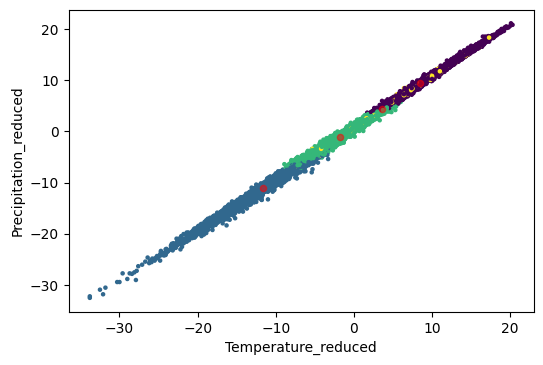

In [171]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels= kmeans.labels_
centers = kmeans.cluster_centers_
center = kmeans.cluster_centers_
label = kmeans.fit_predict(X)
u_labels = np.unique(label)
dam = pd.DataFrame(X)
dam.shape
plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, s=5, alpha= 1)
plt.scatter(centers[:, 0], centers[:,1], marker="o", s=20, c= "red",alpha=0.5)
plt.xlabel("Temperature_reduced")
plt.ylabel("Precipitation_reduced")

plt.show()

K-Means Aplicados al PCA

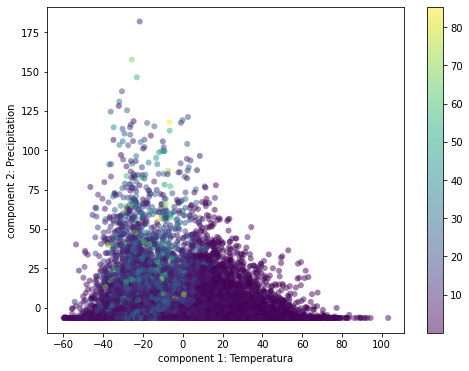

In [173]:
X= data_red[["Temperature_red", "Precipitation_red"]]
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1: Temperatura')
plt.ylabel('component 2: Precipitation')
plt.colorbar();

####  PCA APLICADO A DATOS REDUCIDOS

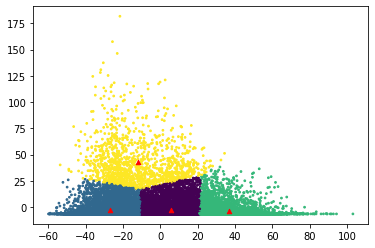

In [175]:
K = 4 # Choose the number of clusters for KMeans.
# The following is common sklearn syntax. We 'fit' the KMeans model to our datset X. The variable kmeans that this
# returns then stores all of the information about KMeans for X that we are interested in.
kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_, s=3)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r', s=20)
plt.show()

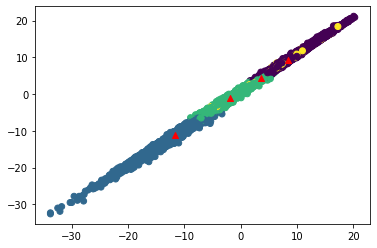

In [176]:
#PARA DEMOSTRAR QUE LAS DISTINTAS COLUMNAS DE TEMPERATURA SON MUY PARECIDAS ENTRE SÍ (explicando la correlacion fuerte entre ellas)
K=4
kmeans = KMeans(n_clusters=K).fit(data.drop(["flow"],axis=1))

plt.scatter(data.iloc[:,1],data.iloc[:,2],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

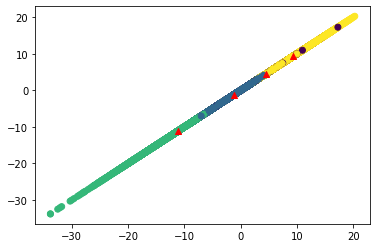

In [133]:
for i in range(len(X.columns)-1):
    plt.scatter(data.iloc[:,i+1],data.iloc[:,i+1],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i+1],centers[:,i+1],marker = '^', c = 'r')
    plt.show()

Clusters aplicados a datos originales, viendo cada combinación posible de columnas de temperatura vs precipitación

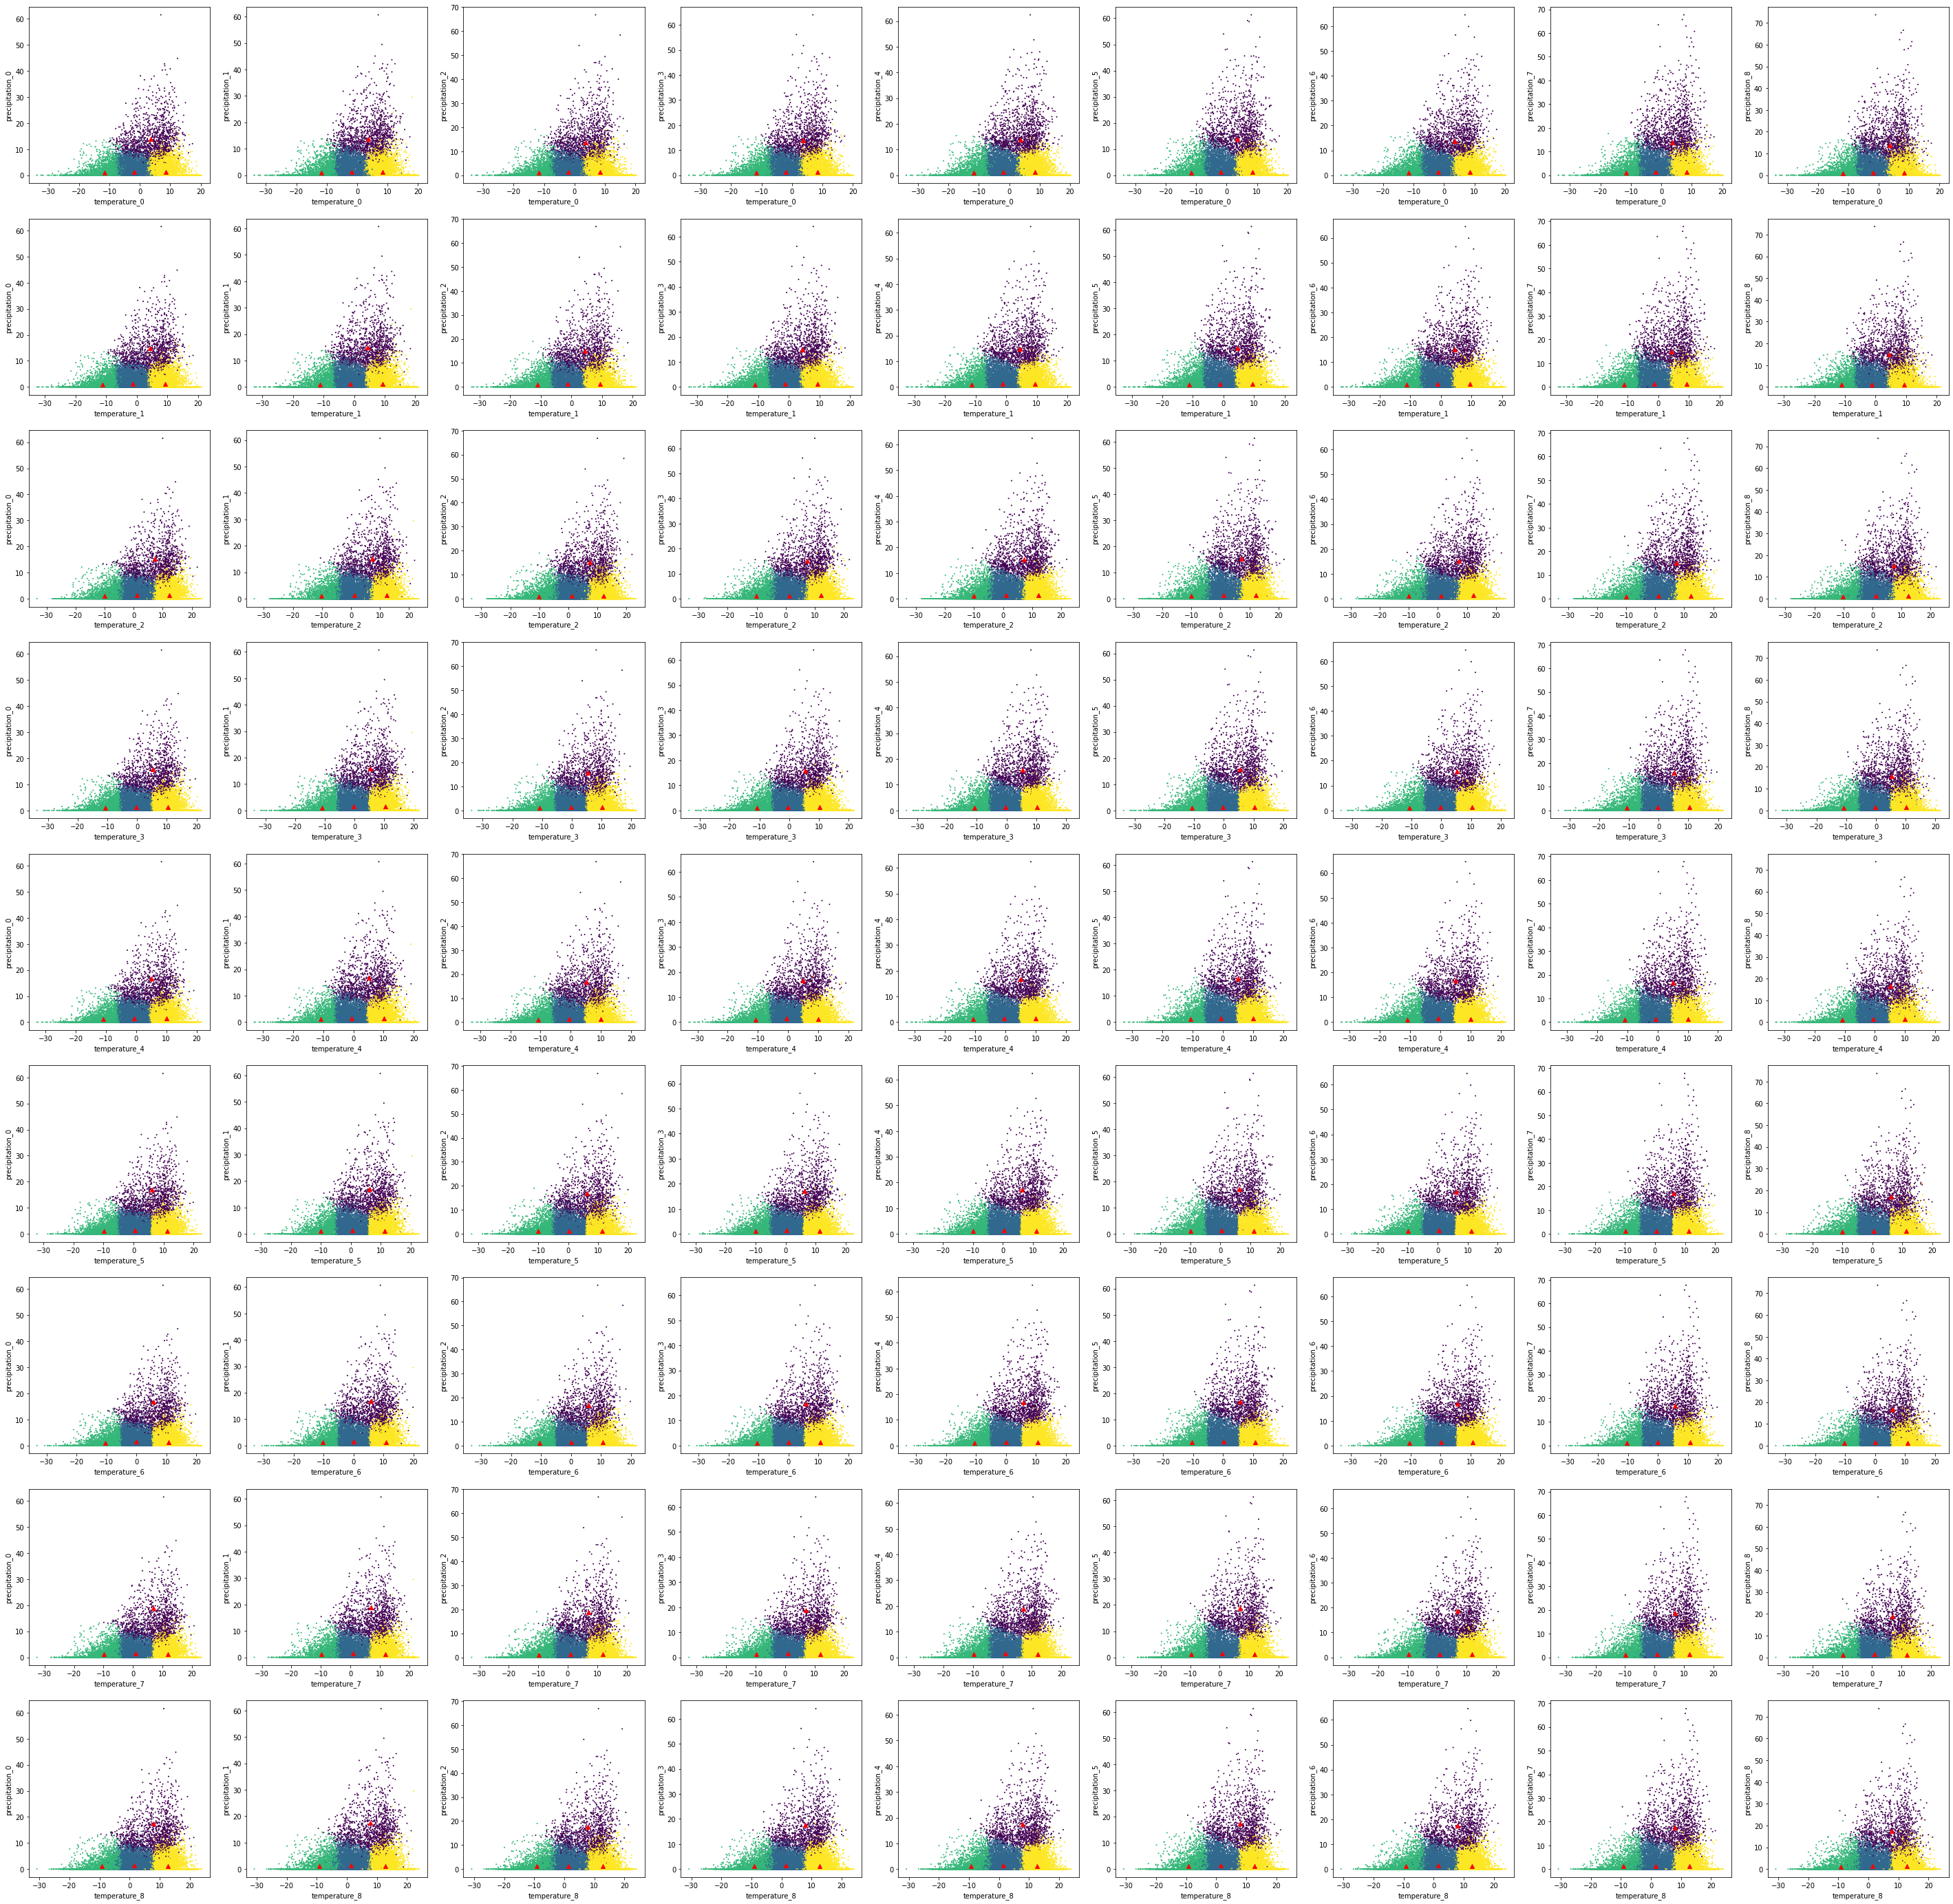

In [132]:
fig, axs = plt.subplots(9,9,figsize=(50,50))

for i in range(9):
    for j in range(9):
        axs[i, j].scatter(data[f"temperature_{i}"], data[f"precipitation_{j}"], s=1, c = kmeans.labels_)
        centers = kmeans.cluster_centers_
        axs[i, j].scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
        axs[i, j].set_xlabel(f"temperature_{i}")
        axs[i, j].set_ylabel(f"precipitation_{j}")

No importa la combinación de entre las 8 columnas, la forma que hace el scatter es generalemnte igual

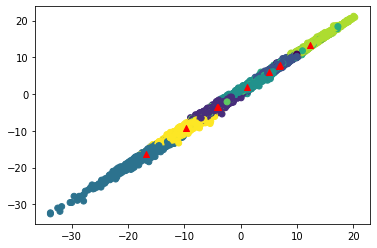

In [19]:
K = 9 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

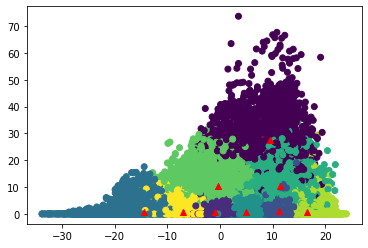

In [20]:
for i in range(9):
    plt.scatter(X.iloc[:,i],X.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
    plt.show()

IndexError: index 9 is out of bounds for axis 1 with size 2

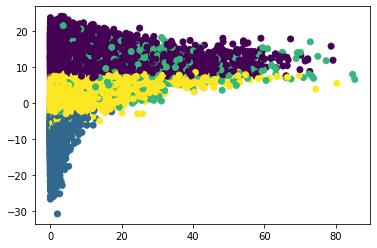

In [105]:
for i in range(9):
    plt.scatter(data.iloc[:,i],data.iloc[:,i+9],c = kmeans.labels_)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,i],centers[:,i+9],marker = '^', c = 'r')
    plt.show()

## Observaciones sobre tiempo

### Tendencias por mes de cada año

In [213]:
data_red["week_num"]= data_red["date"].apply(lambda x: x.isocalendar()[1])
data_red["year"]= data_red["date"].apply(lambda x: x.year)
data_red["month"]= data_red["date"].apply(lambda x: x.month)
data_red

date  Temperature_red  Precipitation_red      flow  week_num  \
0     1958-01-04        43.700607          -6.578077  1.723781         1   
1     1958-01-05        28.921858           1.212091  0.960882         1   
2     1958-01-06        29.877008          31.546004  0.001000         2   
3     1958-01-07        35.950995          13.784001  0.001000         2   
4     1958-01-08        57.957928           3.656685  0.316796         2   
...          ...              ...                ...       ...       ...   
21173 2015-12-27        35.446652          -5.071587  2.177040        52   
21174 2015-12-28        36.483412           7.658852  4.876250        53   
21175 2015-12-29        33.836393          -2.937514  4.998840        53   
21176 2015-12-30        20.798789           3.462255  4.428777        53   
21177 2015-12-31         7.838513          18.510594  4.047925        53   

       year  month  
0      1958      1  
1      1958      1  
2      1958      1  
3      1958      1  
4      1958      1  
...     ...    ...  
21173  2015     12  
21174  2015     12  
21175  2015     12  
21176  2015     12  
21177  2015     12  

[21178 rows x 7 columns]

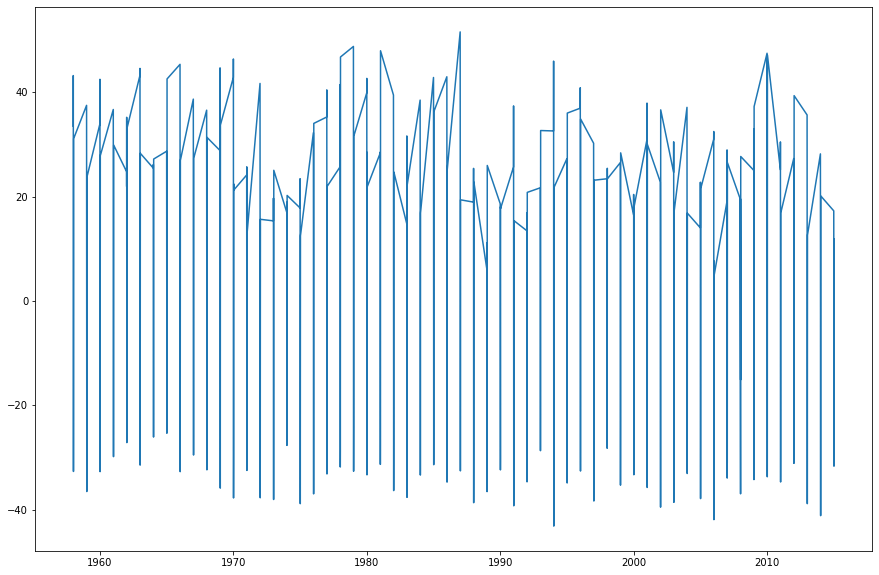

In [242]:
df_grouped_month_year_red = data_red.groupby(by=["year", "month"], ).mean().reset_index()
df_grouped_month_red = data_red.groupby(by=["month"], ).mean().reset_index()
"""
df_grouped_month_year_red["month_year"]="01-" + df_grouped_month_year_red["month"].apply(lambda x: str(x)) +"-"+ df_grouped_month_year_red["year"].apply(lambda x: str(x))
df_grouped_month_year_red["month_year"] = pd.to_datetime(df_grouped_month_year_red["month_year"])
df_grouped_month_year_red

plt.figure(figsize=(15,10))
plt.plot(df_grouped_month_year_red["month_year"], df_grouped_month_year_red["Temperature_red"])"""

'\nplt.plot(data_red[data_red["year"]== 2015]["date"], data_red[data_red["year"]== 2015]["flow"])\nplt.plot(data_red[data_red["year"]== 2014]["date"], data_red[data_red["year"]== 2014]["flow"])'

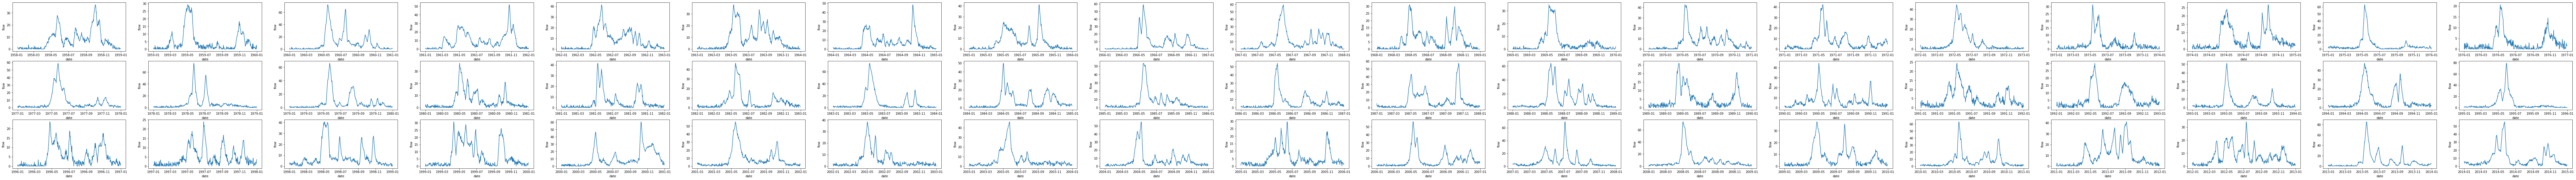

In [257]:
fig, axs = plt.subplots(3,19,figsize=(150,10))
year=1958
counter=0
for i in range(3):
    for j in range(19):
        axs[i, j].plot(data_red[data_red["year"]== year + counter]["date"], data_red[data_red["year"]== year + counter]["flow"])
        axs[i, j].set_xlabel("date")
        axs[i, j].set_ylabel("flow")
        counter+=1
        
"""
plt.plot(data_red[data_red["year"]== 2015]["date"], data_red[data_red["year"]== 2015]["flow"])
plt.plot(data_red[data_red["year"]== 2014]["date"], data_red[data_red["year"]== 2014]["flow"])"""

Se puede observar que los datos de flow no son periodicos

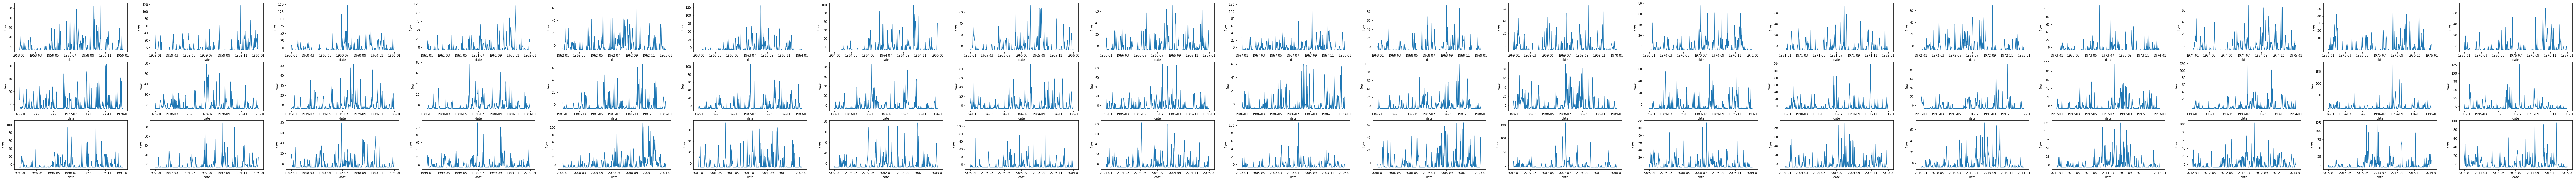

In [264]:
fig, axs = plt.subplots(3,19,figsize=(150,10))
year=1958
counter=0
for i in range(3):
    for j in range(19):
        axs[i, j].plot(data_red[data_red["year"]== year + counter]["date"], data_red[data_red["year"]== year + counter]["Precipitation_red"])
        axs[i, j].set_xlabel("date")
        axs[i, j].set_ylabel("precip")
        counter+=1
        

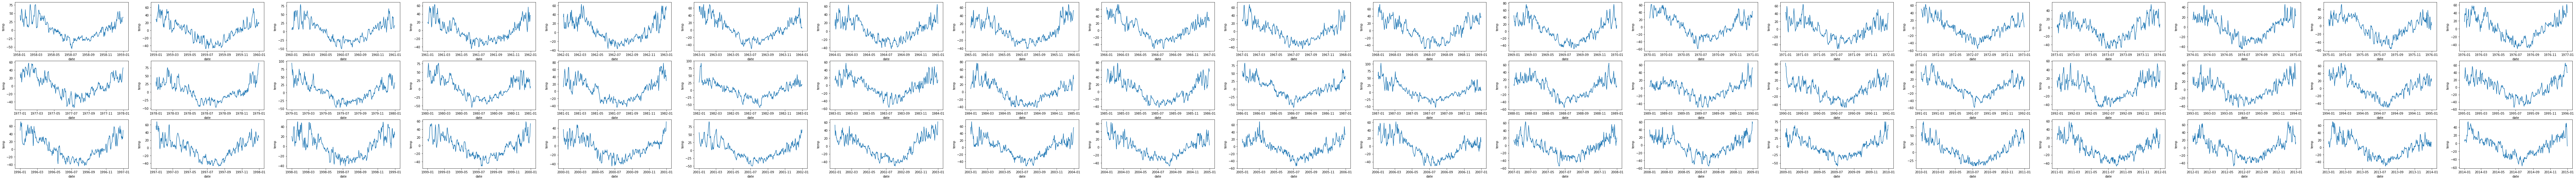

In [267]:
fig, axs = plt.subplots(3,19,figsize=(150,10))
year=1958
counter=0
for i in range(3):
    for j in range(19):
        axs[i, j].plot(data_red[data_red["year"]== year + counter]["date"], data_red[data_red["year"]== year + counter]["Temperature_red"])
        axs[i, j].set_xlabel("date")
        axs[i, j].set_ylabel("temp")
        counter+=1

temperatura tiene cierta periodicidad viendo a todos los años y sus comportamientos

<BarContainer object of 12 artists>

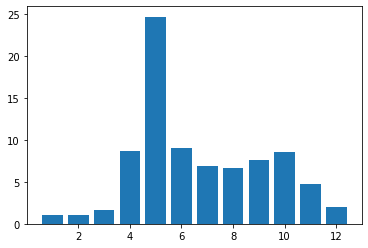

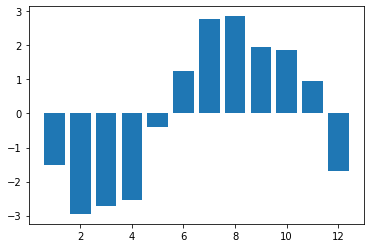

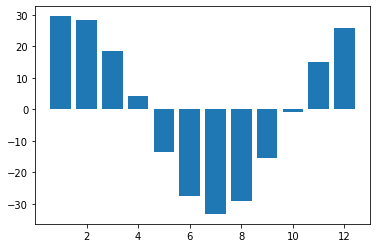

In [227]:
plt.figure()
plt.bar(list(range(1,13)), df_grouped_month_red["flow"])
plt.figure()
plt.bar(list(range(1,13)), df_grouped_month_red["Precipitation_red"])
plt.figure()
plt.bar(list(range(1,13)), df_grouped_month_red["Temperature_red"])

In [109]:
K = 9 # The only thing that needs to be changed

kmeans = KMeans(n_clusters=K).fit(data.drop(["flow"],axis=1))

In [198]:
data_red

date  Temperature_red  Precipitation_red      flow
0     1958-01-04        43.700607          -6.578077  1.723781
1     1958-01-05        28.921858           1.212091  0.960882
2     1958-01-06        29.877008          31.546004  0.001000
3     1958-01-07        35.950995          13.784001  0.001000
4     1958-01-08        57.957928           3.656685  0.316796
...          ...              ...                ...       ...
21173 2015-12-27        35.446652          -5.071587  2.177040
21174 2015-12-28        36.483412           7.658852  4.876250
21175 2015-12-29        33.836393          -2.937514  4.998840
21176 2015-12-30        20.798789           3.462255  4.428777
21177 2015-12-31         7.838513          18.510594  4.047925

[21178 rows x 4 columns]

In [19]:
Temp = X[['tas_0', 'tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7',
       'tas_8']]
Pres = X[['pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7',
       'pr_8']]

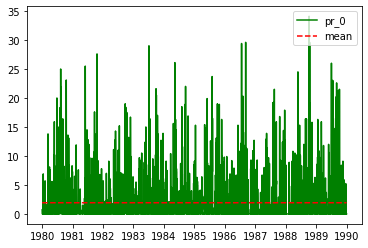

In [20]:
mean = [np.mean(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0])]*len(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')])
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990'),0], color='g', label='pr_0', zorder=1)
plt.plot(Pres.iloc[(Pres.index > '1980') & (Pres.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

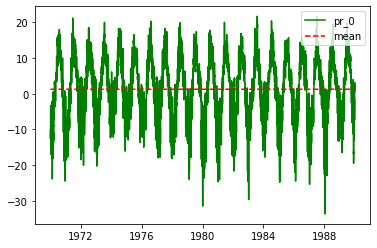

In [21]:
mean = [np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3])]*len(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')])
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),3], color='g', label='pr_0', zorder=1)
plt.plot(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990')].index,mean,linestyle ='--',color = 'r', label='mean', zorder=2)
plt.legend(loc='upper right')
plt.show()

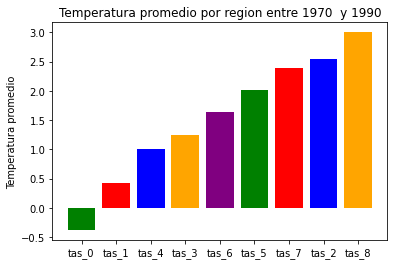

In [44]:
mean = []
for i in range(len(Temp.columns)):
    mean.append(np.mean(Temp.iloc[(Temp.index > '1970') & (Temp.index < '1990'),i]))

Temp_sorted = [x for _, x in sorted(zip(mean, Temp.columns))]
mean_sorted = sorted(mean)
plt.bar(Temp_sorted,mean_sorted,linestyle ='--', label='mean', color=['green','red','blue','orange','purple'])
plt.title("Temperatura promedio por region entre 1970  y 1990")
plt.ylabel('Temperatura promedio')
plt.show()

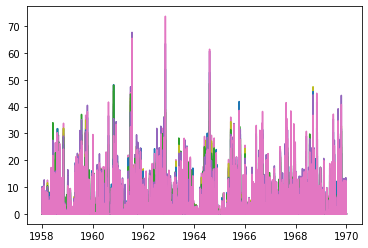

In [23]:
for i in range(len(Pres.columns)):
    # plt.plot(Pres.iloc[(Pres.index > '1970') & (Pres.index < '2010'),i], label=Pres.columns[i])
    plt.plot(Pres.iloc[(Pres.index < '1970'),i])
    plt.plot(np.mean(Pres.iloc[(Pres.index < '1970'),i]),'--')
    # plt.legend()
plt.show()

## Complejos Simpliciales

In [45]:
from sklearn.metrics import pairwise_distances

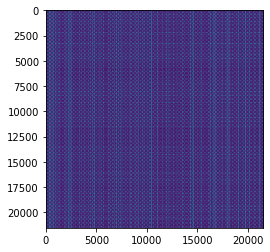

In [46]:
D = pairwise_distances(X)
plt.imshow(D)
plt.show()

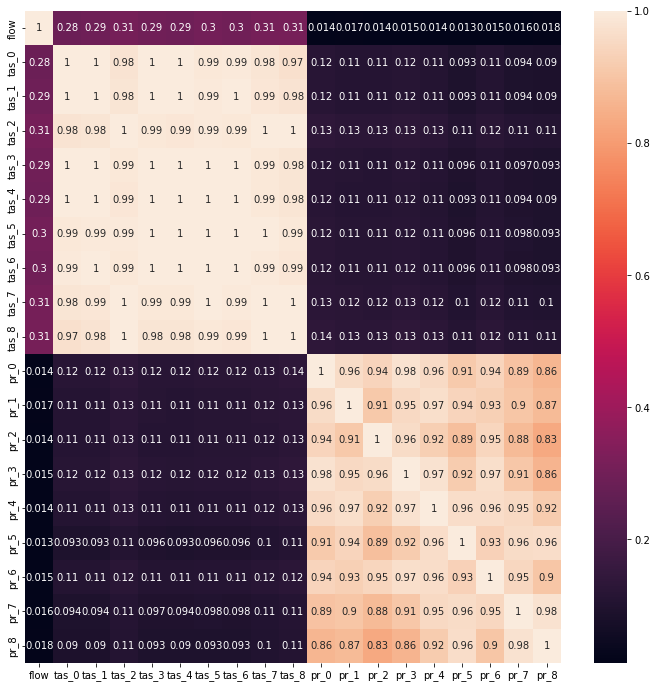

In [ ]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

## TIME SERIES AND PERIODICITY